In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [60]:
dataset=pd.read_excel(r"C:\Users\ASUS\OneDrive\Desktop\Placed or not.xlsx")
dataset.head(1)

,CGPA,TestScore,Placed
0,8.5,82,1


In [61]:
dataset["Placed"].value_counts()

Placed
1    68
0    34
Name: count, dtype: int64

Text(0.5, 1.0, 'Placed_Count')

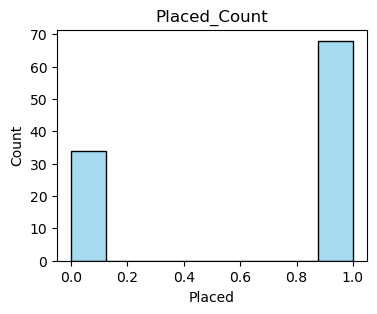

In [231]:
plt.figure(figsize=(4,3))
sns.histplot(dataset["Placed"],stat='count',color="skyblue",edgecolor="black")
plt.title("Placed_Count")


In [97]:
# Checking The Null values 
dataset.isnull().sum()

CGPA         0
TestScore    0
Placed       0
dtype: int64

<Axes: >

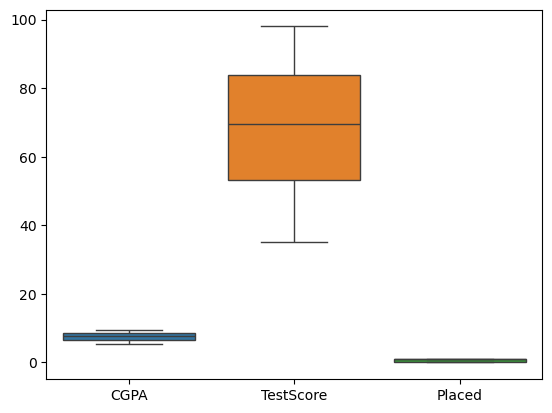

In [99]:
# Checking the Outliers 
sns.boxplot(dataset) # Their is no null vales present in the columns 

# Random Under sampling 

In [101]:
# Means we have to reduce the majority count features to the minority count feature 

In [108]:
# We have to doenload one library which name is imblearn
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [153]:
from imblearn.under_sampling import RandomUnderSampler

In [155]:
# Split the dataset into x AND y 
x=dataset.iloc[:,:-1]
y=dataset["Placed"]

In [157]:
ru=RandomUnderSampler()

In [159]:
ru.fit(x,y)

RandomUnderSampler()

In [163]:
ru_x,ru_y=ru.fit_resample(x,y)

In [167]:
ru_y.value_counts()

Placed
0    34
1    34
Name: count, dtype: int64

In [207]:
df1 = pd.DataFrame(np.column_stack((ru_x, ru_y)),columns=dataset.columns)
df1.head(1)

,CGPA,TestScore,Placed
0,6.8,58.0,0.0


Text(0.5, 1.0, 'After_Random_Sampling')

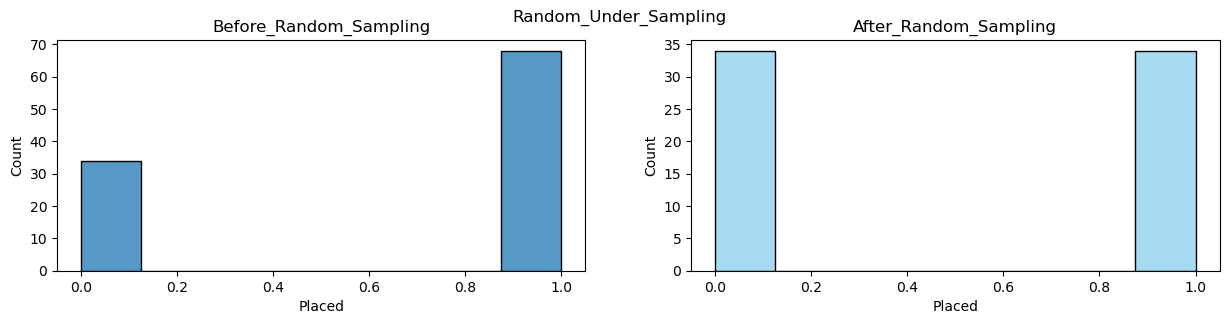

In [219]:
fig,axes=plt.subplots(1,2,figsize=(15,3))
plt.suptitle("Random_Under_Sampling")
sns.histplot(dataset["Placed"],stat='count',edgecolor="black",ax=axes[0])
axes[0].set_title("Before_Random_Sampling")
sns.histplot(df1["Placed"],stat='count',color="skyblue",edgecolor="black",ax=axes[1])
axes[1].set_title("After_Random_Sampling")

In [199]:
df1

,CGPA,TestScore,Placed
0,6.8,58.0,0.0
1,5.9,45.0,0.0
2,6.5,55.0,0.0
3,6.2,50.0,0.0
4,5.8,42.0,0.0
...,...,...,...
63,8.6,83.0,1.0
64,9.5,95.0,1.0
65,7.9,79.0,1.0
66,9.1,93.0,1.0
